Estadísticas Descriptivas:
              Likes  Comentarios  Visualizaciones  Duración del video (s)
count    121.000000   121.000000       121.000000              121.000000
mean    1316.371901    39.008264     15391.876033               50.079124
std     1930.321602    48.724480     39250.143838               18.219889
min      304.000000     3.000000      2277.000000               26.000000
25%      640.000000    18.000000      4926.000000               38.133000
50%      828.000000    27.000000      6294.000000               45.900000
75%     1250.000000    39.000000     10244.000000               56.200000
max    14659.000000   361.000000    337001.000000              133.491000

Top 5 videos con más Likes:
                                       Texto del reel  Likes  Comentarios  \
72  🇮🇨 Soy canario y hasta hace un tiempo no sabía...  14659          361   
99  ⚓️ La construcción del Puerto de la Luz supuso...  14514          333   
79  🏄🏽‍♂️ Cerca de la playa de Las Canteras, po

C:\Users\henry\AppData\Local\Temp\ipykernel_7376\1629292173.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\henry\AppData\Local\Temp\ipykernel_7376\1629292173.py:54: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



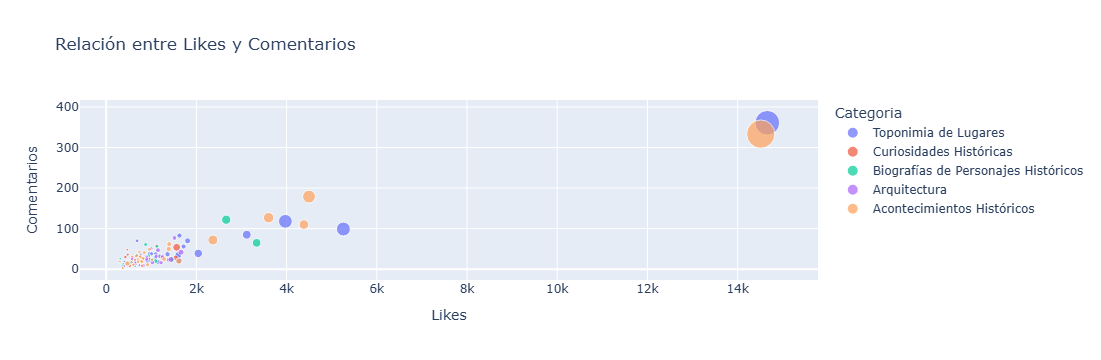

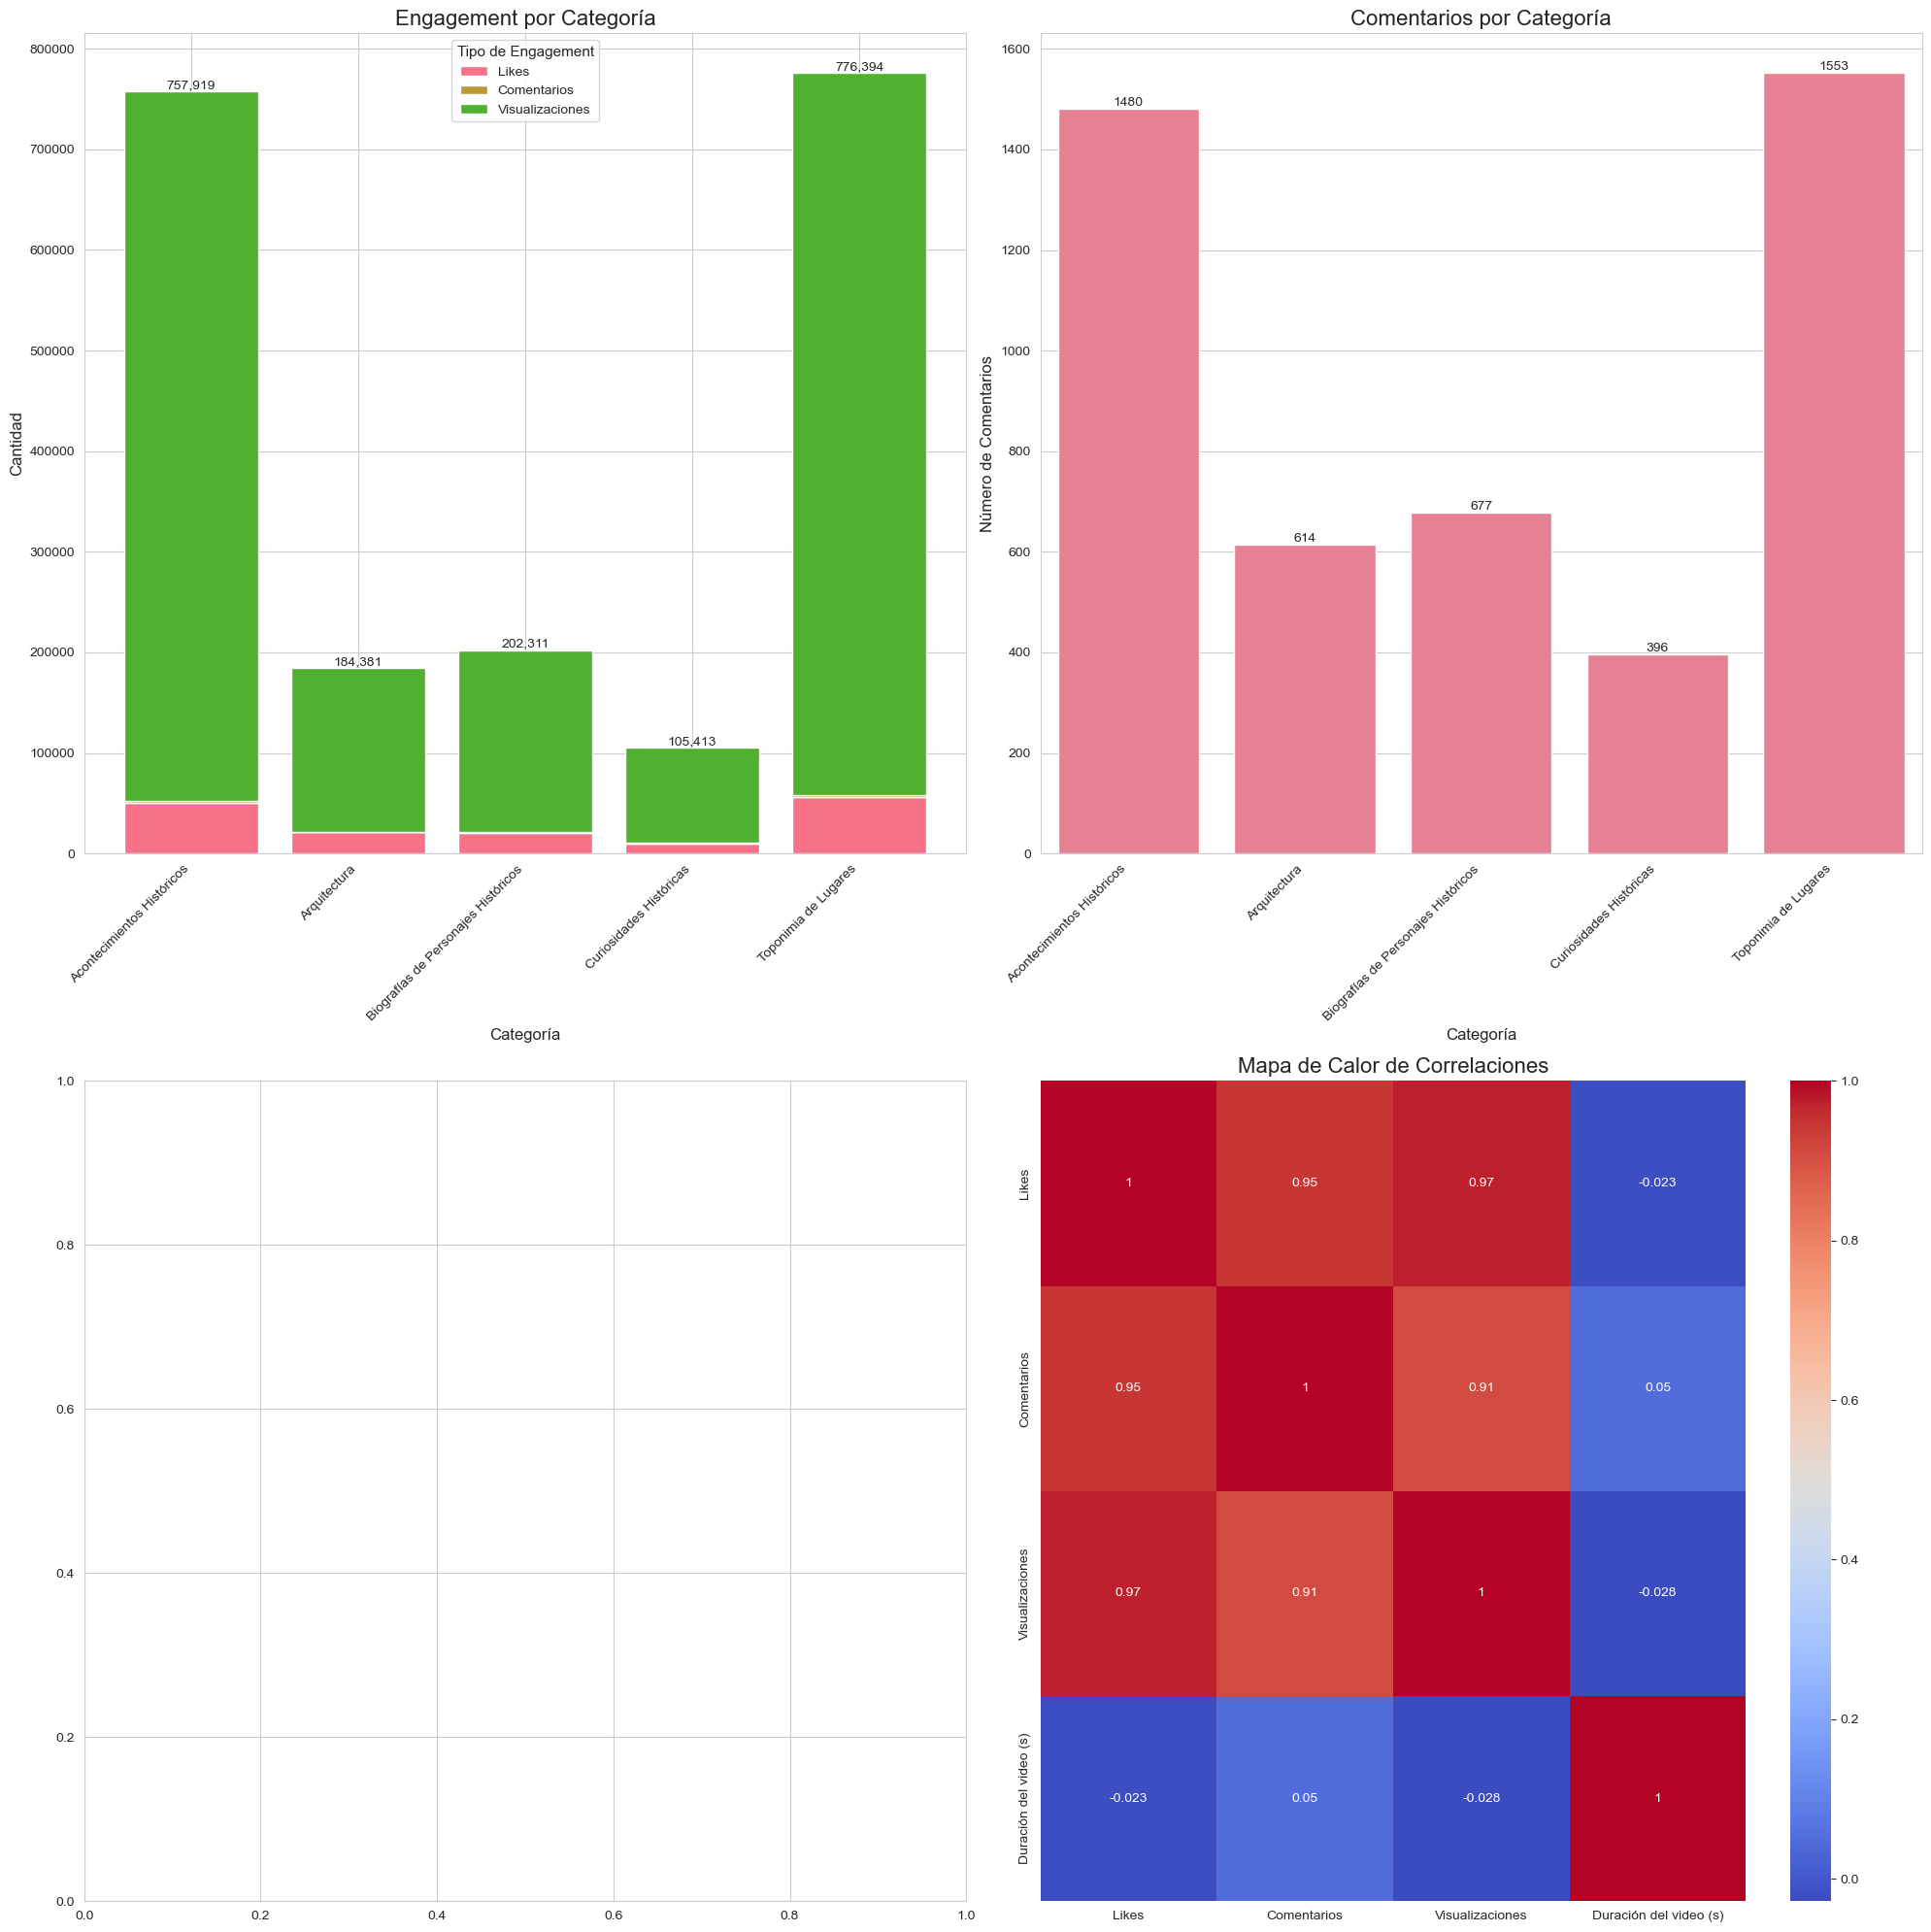

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
df = pd.read_excel('excel26deenero.xlsx')

# Estadísticas descriptivas para columnas numéricas
descriptive_stats = df[['Likes', 'Comentarios', 'Visualizaciones', 'Duración del video (s)']].describe()
print("Estadísticas Descriptivas:")
print(descriptive_stats)

# Seleccionar el top 5 videos con más likes
top_5_likes = df[['Texto del reel', 'Likes', 'Comentarios', 'Visualizaciones']].sort_values(by='Likes', ascending=False).head(5)

# Mostrar la tabla
print("\nTop 5 videos con más Likes:")
print(top_5_likes)
# Preparar los datos para la visualización
data = df.groupby('Categoria').agg({
    'Likes': 'sum',
    'Comentarios': 'sum',
    'Visualizaciones': 'sum'
}).reset_index()

# Crear la figura con cuatro subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Gráfico de barras apiladas
sns.set_style("whitegrid")
sns.set_palette("husl")

bottom = np.zeros(len(data))
for column in ['Likes', 'Comentarios', 'Visualizaciones']:
    ax1.bar(data['Categoria'], data[column], bottom=bottom, label=column)
    bottom += data[column]

ax1.set_title('Engagement por Categoría', fontsize=16)
ax1.set_xlabel('Categoría', fontsize=12)
ax1.set_ylabel('Cantidad', fontsize=12)
ax1.legend(title='Tipo de Engagement', title_fontsize='11', fontsize='10')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

for i, categoria in enumerate(data['Categoria']):
    total = sum(data.loc[i, ['Likes', 'Comentarios', 'Visualizaciones']])
    ax1.text(i, total, f'{total:,}', ha='center', va='bottom')

# Gráfico de barras solo para comentarios
sns.barplot(x='Categoria', y='Comentarios', data=data, ax=ax2)
ax2.set_title('Comentarios por Categoría', fontsize=16)
ax2.set_xlabel('Categoría', fontsize=12)
ax2.set_ylabel('Número de Comentarios', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

for i, v in enumerate(data['Comentarios']):
    ax2.text(i, v, str(v), ha='center', va='bottom')


# Mapa de calor para visualizar correlaciones entre variables numéricas
numeric_cols = ['Likes', 'Comentarios', 'Visualizaciones', 'Duración del video (s)']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=ax4)
ax4.set_title('Mapa de Calor de Correlaciones', fontsize=16)

import plotly.express as px

# Crear gráfico interactivo
fig = px.scatter(df, x='Likes', y='Comentarios', size='Visualizaciones', 
                 color='Categoria',
                 hover_data=['Titulo'],
                 title='Relación entre Likes y Comentarios',
                 labels={'Likes': 'Likes', 'Comentarios': 'Comentarios'})

# Mostrar gráfico
fig.show()
plt.tight_layout()
plt.show()
